<font color='blue'> Привет, ниже мои комментарии выделены синим. </font>

In [67]:
import pandas as pd
import datetime as dt
import numpy as np

In [68]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [69]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [198]:
data['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Применим метод ICE для приоритезации гипотез

In [70]:
data['Ice'] = ((data['Impact']*data['Confidence'])/ data['Efforts']).round(2)

In [71]:
data.sort_values(by = 'Ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Применим метод RICE для приоретизации гипотез и сравним результаты

In [72]:
data['Rice'] = ((data['Reach']*data['Impact']*data['Confidence'])/ data['Efforts']).round(2)

In [73]:
data.sort_values(by = 'Rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


При применении ICE приоритетными оказались гипотезы 8, 0 и 7, однако после применения ICE в приоритет вышли гипотезы 7, 2 и 0. У гипотезы 7 значение охвата явялется максимальным, а значит распространяется на всех пользователей без исключения. А у гипотезы 0 значения охвата небольшое (3), однако влияние этой гипотезы на пользователей максимальное. Гипотеза 8 имеет высокое влияние на пользвтаелей и высокую точность оценок, однако охватывает лишь 10% пользоватлей, поэтому при RICE оказалась лишь на 5 месте.


<font color='blue'> Приоритизация гипотезы выполнена правильно. </font>

In [74]:
orders = pd.read_csv('/datasets/orders.csv')

In [75]:
visits = pd.read_csv('/datasets/visitors.csv')

In [76]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [77]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [78]:
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [80]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [81]:
datesGroups = orders[['date','group']].drop_duplicates()

In [82]:
ordersAggregated = datesGroups.apply(lambda x:orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])].agg({'date': 'max', 
                                                                                                         'group': 'max',
                                                                                                         'transactionId': pd.Series.nunique,
                                                                                                         'visitorId': pd.Series.nunique,
                                                                                                         'revenue': 'sum'}), axis = 1).sort_values(by=['date','group'])

In [83]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [84]:
visitorsAggregated = datesGroups.apply(lambda x:visits[np.logical_and(visits['date'] <= x['date'], 
                                                                         visits['group'] == x['group'])].agg({'date':'max',
                                                                                                                'group':'max',
                                                                                                                'visitors': 'sum'}),axis = 1).sort_values(['date','group'])

In [85]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [86]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [87]:
cummulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [88]:
import matplotlib.pyplot as plt

In [89]:
cummulativerevenueA = cummulativeData[cummulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [90]:
cummulativerevenueB = cummulativeData[cummulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

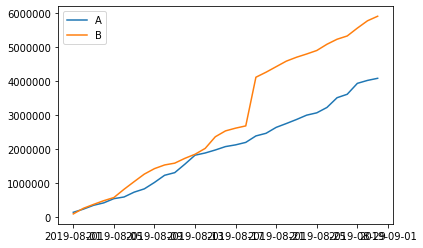

In [91]:
plt.plot(cummulativerevenueA['date'], cummulativerevenueA['revenue'], label = 'A')
plt.plot(cummulativerevenueB['date'], cummulativerevenueB['revenue'], label = 'B')
plt.legend()

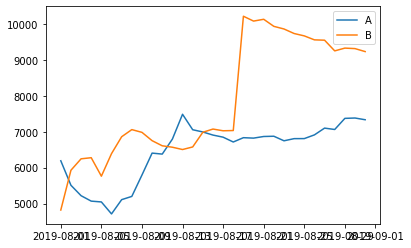

In [92]:
plt.plot(cummulativerevenueA['date'], cummulativerevenueA['revenue'] / cummulativerevenueA['orders'], label = 'A')
plt.plot(cummulativerevenueB['date'], cummulativerevenueB['revenue'] / cummulativerevenueB['orders'], label = 'B')
plt.legend()

На графике кумулятивной выручки по группам видно, что выручка группы А почти равномерно увеличивается с течением теста, а вот на графике выручки группы В есть резкий скачок, что может свидетельствовать либо о резком увеличении числа заказов, либо о наличии дорогих заказов. На графике среднего чека данный скачок повторяется у группы В, т.е. в данных присутствуют очень дорогие заказы. К концу теста средний чек группы А имеет тенденцию к увеличению, а средний чек группы В имеет тенденцию к уменьшению.

In [93]:
mergedCummulativeRevenue = cummulativerevenueA.merge(cummulativerevenueB, left_on = 'date', right_on = 'date',
                                                     how = 'left', suffixes = ['A', 'B'])

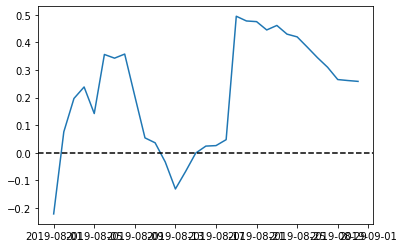

In [94]:
plt.plot(mergedCummulativeRevenue['date'], ((mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/
        (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках графика наблюдаются скачки значений, предположительно где-то в значениях есть выбросы.

<font color='blue'> Хорошо, все графики построены верно. Только с подписями не очень хорошо. </font>

In [95]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [96]:
cummulativeData['convertion'] = cummulativeData['orders'] / cummulativeData['visitors']

In [97]:
cummulativeConvertionA = cummulativeData[cummulativeData['group']=='A']
cummulativeConvertionB = cummulativeData[cummulativeData['group']=='B']

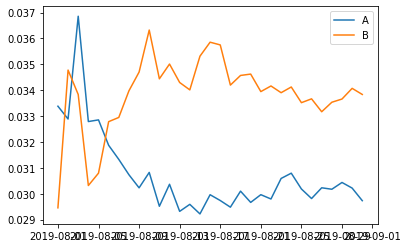

In [98]:
plt.plot(cummulativeConvertionA['date'], cummulativeConvertionA['convertion'], label = 'A')
plt.plot(cummulativeConvertionB['date'], cummulativeConvertionB['convertion'], label = 'B')
plt.legend()

Конверсия групп А и В в начале теста была нестабильной, но ближе к концу установилась. Конверсия группы В заметно выше конверсии группы А.

In [99]:
mergedCummulativeConvertions = cummulativeConvertionA[['date','convertion']].merge(cummulativeConvertionB[['date','convertion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


In [100]:
mergedCummulativeConvertions['date'].sort_values()

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
5    2019-08-06
6    2019-08-07
7    2019-08-08
8    2019-08-09
9    2019-08-10
10   2019-08-11
11   2019-08-12
12   2019-08-13
13   2019-08-14
14   2019-08-15
15   2019-08-16
16   2019-08-17
17   2019-08-18
18   2019-08-19
19   2019-08-20
20   2019-08-21
21   2019-08-22
22   2019-08-23
23   2019-08-24
24   2019-08-25
25   2019-08-26
26   2019-08-27
27   2019-08-28
28   2019-08-29
29   2019-08-30
30   2019-08-31
Name: date, dtype: datetime64[ns]

['2019-08-01', '2019-08-31', -0.1, 0.25]

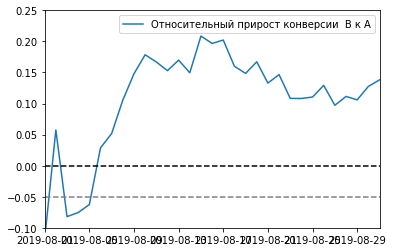

In [101]:
plt.plot(mergedCummulativeConvertions['date'], mergedCummulativeConvertions['convertionB']/
         mergedCummulativeConvertions['convertionA']-1, 
         label="Относительный прирост конверсии  B к A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')
plt.axis(["2019-08-01",'2019-08-31', -0.1, 0.25])

В начале теста конверсия В проигрывала конверсии А, затем зафиксированы резкие скачки отношения конверсий. С срередины теста конверсия В значительно превышает А и к концу теста имеет тенденцию к постепенному росту.

<font color='blue'> Эти графики тоже построены и проанализированы правильно, но опять подписи не очень четкие. </font>

In [102]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


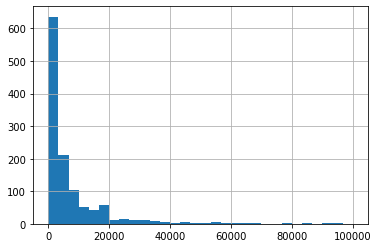

In [103]:
orders['revenue'].hist(bins = 30, range = (0, 100000))

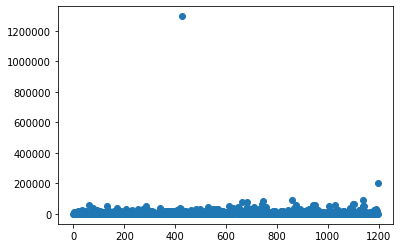

In [104]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

In [105]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

На графиках распределения стоимостей заказов видно, что в данных присутствуют выбросы. Большинство стоимостей заказов не превышают границу 20000. Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Возьмем за нижнюю границу стоимости заказов сумму 28000 рублей.

<font color='blue'> Хорошо. </font>

In [106]:
ordersbyUsers = orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('visitorId',
                                                          as_index = False).agg({'transactionId':pd.Series.nunique})

In [107]:
ordersbyUsers.columns = ['UserId', 'orders']
ordersbyUsers.sort_values(by = 'orders', ascending=False).head(10)

,UserId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


В данных присутствуют пользователи, совершившие 5 заказов и более.

(array([937.,   0.,  64.,   0.,  17.,   0.,   3.,   0.,   6.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   2.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

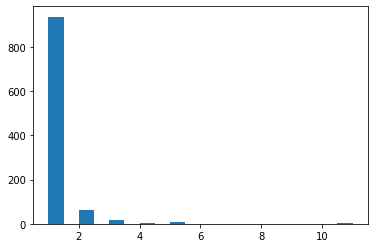

In [108]:
plt.hist(ordersbyUsers['orders'], bins = 20)

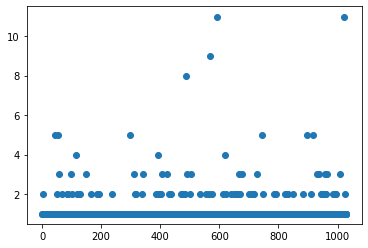

In [109]:
xx_values = pd.Series(range(0, len(ordersbyUsers['orders'])))
plt.scatter(xx_values, ordersbyUsers['orders'])

In [110]:
np.percentile(ordersbyUsers['orders'], [95,99])

array([2., 4.])

Не более 5% пользователей совершали больше 2 заказов, не более 1% пользователей совершили более 4 заказов. Возьмем за нижнюю границу числа заказов на пользователя 3 заказа.

In [111]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [112]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [113]:
visitsAdaily = visits[visits['group']=='A'][['date', 'visitors']]
visitsAdaily.columns = ['date', 'visitorsPerDateA']

In [114]:
visitsAcummulative = visitsAdaily.apply(lambda x: visitsAdaily[visitsAdaily['date'] <= x['date']].agg({'date':'max',
                                                                                                      'visitorsPerDateA':'sum'}), axis = 1)

In [115]:
visitsAcummulative.columns = ['date', 'visitorsCummulativeA']

In [116]:
visitsBdaily = visits[visits['group']=='B'][['date', 'visitors']]
visitsBdaily.columns = ['date', 'visitorsPerDateB']

In [117]:
visitsBcummulative = visitsBdaily.apply(lambda x: visitsBdaily[visitsBdaily['date'] <= x['date']].agg({'date':'max',
                                                                                                      'visitorsPerDateB':'sum'}), axis=1)

In [118]:
visitsBcummulative.columns = ['date', 'visitorsCummulativeB']

In [122]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique,
                                                                                  'revenue':'sum'})

In [124]:
ordersADaily.columns = ['date', 'ordersPerdateA', 'revenuePerdateA']

In [127]:
ordersACummulative = ordersADaily.apply(lambda x:ordersADaily[ordersADaily['date']<= x['date']].agg({'date':'max',
                                                                                                     'ordersPerdateA':'sum',
                                                                                                     'revenuePerdateA':'sum'}),
                                        axis=1).sort_values(by=['date'])

In [129]:
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [130]:
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique,
                                                                                  'revenue':'sum'})

In [131]:
ordersBDaily.columns = ['date', 'ordersPerdateB', 'revenuePerdateB']

In [132]:
ordersBCummulative = ordersBDaily.apply(lambda x:ordersBDaily[ordersBDaily['date']<= x['date']].agg({'date':'max',
                                                                                                     'ordersPerdateB':'sum',
                                                                                                     'revenuePerdateB':'sum'}),
                                        axis=1).sort_values(by=['date'])

In [133]:
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [138]:
data_for_tests = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitsAdaily, left_on='date', right_on='date', how='left')\
    .merge(visitsBdaily, left_on='date', right_on='date', how='left')\
    .merge(visitsAcummulative, left_on='date', right_on='date', how='left')\
    .merge(visitsBcummulative, left_on='date', right_on='date', how='left')

In [140]:
data_for_tests.head(5)

,date,ordersPerdateA,revenuePerdateA,ordersPerdateB,revenuePerdateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.

In [144]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})

In [146]:
ordersByUsersA.columns = ['userId', 'orders']

In [147]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})

In [148]:
ordersByUsersB.columns = ['userId', 'orders']

In [150]:
sampleA=pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data_for_tests['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])),
                                                       name= 'orders')], axis=0)

In [151]:
sampleB=pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data_for_tests['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])),
                                                       name= 'orders')], axis=0)

In [157]:
import scipy.stats as stats
alpha=0.05

In [188]:
results = stats.mannwhitneyu(sampleA, sampleB)
print("p-value:{0:.3f}".format(results.pvalue))
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:0.008
Отвергаем нулевую гипотезу: разница статистически значима


In [154]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.138


Т.к. p-value меньше 0.05, значит в конверсии между группами присутствуют статистически значимые различия. Относительное преимущество в конверсии группы В над А равно 13,8%.

<font color='blue'> Верно. </font>

In [190]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print("p-value:{0:.3f}".format(results.pvalue))
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [165]:
print("p-value:{0:.3f}".format(orders[orders['group']=='A']['revenue'].mean()/orders[orders['group']=='B']['revenue'].mean()-1))

p-value:-0.206


Т.к. p-value значительно больше 0.05, то будем считать, что статистически значимых различий в средних чеках групп А и В нет. Однако средний чек группы В ниже среднего чека группы А на 20,6%.

Очистим данные от аномально дорогих и многочисленных заказов.

<font color='blue'> Правильно. </font>

Примем за аномалии количество заказов более 3 шт и заказы дороже 28000 руб. 

In [168]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis=0)

In [169]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [171]:
usersWithExpensiveOrders.columns = ['userId']

In [174]:
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [175]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

In [176]:
abnormalUsers.shape

(63,)

Всего выявлено 63 аномальных пользователя

In [177]:
sampleAfiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
                            pd.Series(0, np.arange(data_for_tests['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                     name='orders')], axis=0)

In [178]:
sampleBfiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
                            pd.Series(0, np.arange(data_for_tests['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                                     name='orders')], axis=0)

In [193]:
results = stats.mannwhitneyu(sampleAfiltered, sampleBfiltered)
print("p-value:{0:.3f}".format(results.pvalue))
if (results.pvalue > alpha) :
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:0.009
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [181]:
print("{0:.3f}".format(sampleBfiltered.mean()/sampleAfiltered.mean()-1))

0.148


P-value по очищенным данным также меньше 0.05, значит между конверсиями по группам все также есть статистически значимые различия. Относительное превышение конверсии группы В над группой А после удаления выбросов увеличилось и составило 14,8%.

<font color='blue'> Все верно
    . </font>

In [195]:
results = stats.mannwhitneyu(
orders[np.logical_and(
orders['group']=='A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(
orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print("p-value:{0:.3f}".format(results.pvalue))
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:0.488
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [196]:
print("{0:.3f}".format(orders[np.logical_and(
orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(
orders['group']=='A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() -1))

-0.017


P-value по очищенным данным увеличилось и все также значительно больше 0.05, значит статистически значимых различий в средних чеках групп А и В нет. Разница между сегментами сократилась с 20% до 17%. 

<font color='blue'> Гипотезы проверены правильно. </font>

### Выводы:

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

* Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;

* Конверсия группы В значительно превышает конверсию группы А и имеет тенденцию к росту;

* Куммулятивные значения среднего чека колеблются

Таким образом, группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата. Выводы по различию средних чеков сегментов по результатам теста делать нецелесооразно. 
Т.к. приоритизированной гипотезой выступает "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", можно остановить тест и признать его успешным. Т.к. подписка на e-mail рассылки магазина заметно увеличила конверсию пользователей.

<font color='blue'> Проект выполнен хорошо, молодец. </font>